In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

C:\Users\vamsi\AppData\Local\Temp\ipykernel_10436\4274185531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['alcohol'])


<Axes: xlabel='alcohol', ylabel='Density'>

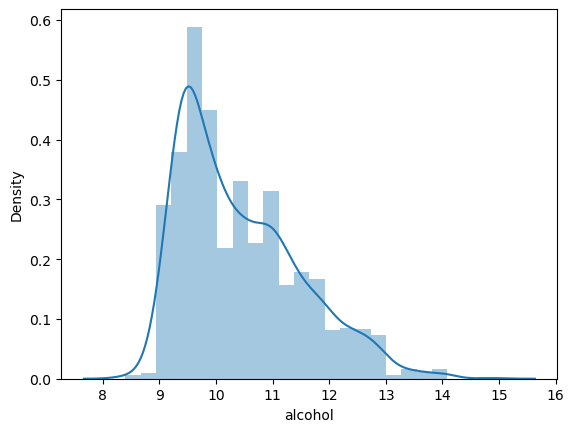

In [6]:
sns.distplot(data['alcohol']) 

In [8]:
x=data.iloc[:,:-2]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71


In [10]:
y=data.alcohol
y

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=6)
print('\n*****Training Data Shape" *******\n')
print("\nTraining data-X- Shape:\t",xtrain.shape)
print("\nTraining data-y- Shape:\t",ytrain. shape)
print('\n***************Testing Data Shape***************\n')
print('\nTesting data (x-Input) Shape:\t',xtest.shape)
print('\nTesting data (y-Outcome) Shape:\t',ytest.shape)


*****Training Data Shape" *******


Training data-X- Shape:	 (1199, 10)

Training data-y- Shape:	 (1199,)

***************Testing Data Shape***************


Testing data (x-Input) Shape:	 (400, 10)

Testing data (y-Outcome) Shape:	 (400,)


# Base Model

# Linear Regression Model

In [30]:
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression()
print('\n*****Linear Regression Model" *******\n')
lin_reg.fit(xtrain,ytrain)
print('\nHyperparameter :\n\n',lin_reg.get_params())
print('\nTraining Completed')
ypred_lin_reg=lin_reg.predict(xtest)
print('\nTesting Completed')
print('\n*****Performance measure for Linear Regression " *******\n')
from sklearn.metrics import r2_score,mean_squared_error
print("*"*100)
Accuracy_lin_reg=r2_score(ytest,ypred_lin_reg)
MSE_lin_reg=mean_squared_error(ytest,ypred_lin_reg)
RMSE_lin_reg=np.sqrt(MSE_lin_reg)
print("\nAccuracy Score Linear Regression:\t",Accuracy_lin_reg)

print("*"*100)
      
print("\nMSE Linear Regression :\t",MSE_lin_reg)

print("*"*100)

print('\nRMSE Linear Regression : \t',RMSE_lin_reg)



*****Linear Regression Model" *******


Hyperparameter :

 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}

Training Completed

Testing Completed

*****Performance measure for Linear Regression " *******

****************************************************************************************************

Accuracy Score Linear Regression:	 0.6670903682188694
****************************************************************************************************

MSE Linear Regression :	 0.30581585942431827
****************************************************************************************************

RMSE Linear Regression : 	 0.5530062019763596


# KNN Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg=KNeighborsRegressor(n_neighbors=3)
print('\n*****KNN Regression Model" *******\n')
knn_reg.fit(xtrain,ytrain)
print('\nHyperparameter :\n\n',knn_reg.get_params())
print('\nTraining Completed')
ypred_knn_reg=knn_reg.predict(xtest)
print('\nTesting Completed')
print('\n*****Performance measure for KNN Regression " *******\n')
from sklearn.metrics import r2_score,mean_squared_error
print("*"*100)
Accuracy_knn_reg=r2_score(ytest,ypred_knn_reg)
MSE_knn_reg=mean_squared_error(ytest,ypred_knn_reg)
RMSE_knn_reg=np.sqrt(MSE_knn_reg)
print("\nAccuracy Score KNN Regression:\t",Accuracy_knn_reg)

print("*"*100)
      
print("\nMSE KNN Regression :\t",MSE_knn_reg)

print("*"*100)

print('\nRMSE KNN Regression : \t',RMSE_knn_reg)



*****KNN Regression Model" *******


Hyperparameter :

 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}

Training Completed

Testing Completed

*****Performance measure for KNN Regression " *******

****************************************************************************************************

Accuracy Score KNN Regression:	 -0.04912214305811591
****************************************************************************************************

MSE KNN Regression :	 0.9637395833333335
****************************************************************************************************

RMSE KNN Regression : 	 0.9817023904082813


# Decision Tree Regression Model

In [28]:
from sklearn.tree import DecisionTreeRegressor
des_tree=DecisionTreeRegressor()
print('\n*****Decision Tree Regression Model" *******\n')
des_tree.fit(xtrain,ytrain)
print('\nHyperparameter :\n\n',des_tree.get_params())
print('\nTraining Completed')
ypred_des_tree=des_tree.predict(xtest)
print('\nTesting Completed')
print('\n*****Performance measure for Decision Tree Regression " *******\n')
from sklearn.metrics import r2_score,mean_squared_error
print("*"*100)
Accuracy_des_tree=r2_score(ytest,ypred_des_tree)
MSE_des_tree=mean_squared_error(ytest,ypred_des_tree)
RMSE_des_tree=np.sqrt(MSE_des_tree)
print("\nAccuracy Score Decision Tree Regression:\t",Accuracy_des_tree)

print("*"*100)
      
print("\nMSE Decision Tree Regression :\t",MSE_des_tree)

print("*"*100)

print('\nRMSE Decision Tree Regression : \t',RMSE_des_tree)



*****Decision Tree Regression Model" *******


Hyperparameter :

 {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Training Completed

Testing Completed

*****Performance measure for Decision Tree Regression " *******

****************************************************************************************************

Accuracy Score Decision Tree Regression:	 0.37162589278141955
****************************************************************************************************

MSE Decision Tree Regression :	 0.5772340277777777
****************************************************************************************************

RMSE Decision Tree Regression : 	 0.7597591906504176


# Support Vector Regression

In [27]:
from sklearn.svm import SVR
svr=SVR()
print('\n*****SVR Regression Model" *******\n')
svr.fit(xtrain,ytrain)
print('\nHyperparameter :\n\n',svr.get_params())
print('\nTraining Completed')
ypred_svr=svr.predict(xtest)
print('\nTesting Completed')
print('\n*****Performance measure for SVR Regression " *******\n')
from sklearn.metrics import r2_score,mean_squared_error
print("*"*100)
Accuracy_svr=r2_score(ytest,ypred_svr)
MSE_svr=mean_squared_error(ytest,ypred_svr)
RMSE_svr=np.sqrt(MSE_svr)
print("\nAccuracy Score SVR Regression:\t",Accuracy_svr)

print("*"*100)
      
print("\nMSE SVR Regression :\t",MSE_svr)

print("*"*100)

print('\nRMSE SVR Regression : \t',RMSE_svr)



*****SVR Regression Model" *******


Hyperparameter :

 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Training Completed

Testing Completed

*****Performance measure for SVR Regression " *******

****************************************************************************************************

Accuracy Score SVR Regression:	 0.07947298110754741
****************************************************************************************************

MSE SVR Regression :	 0.8456101432084105
****************************************************************************************************

RMSE SVR Regression : 	 0.9195706298095925


# Boosting -Adaboost with knn reg model

In [47]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(base_estimator=knn_reg,n_estimators=8)
print('\n*****AdaBoost Regression Model" *******\n')
ada.fit(xtrain,ytrain)
print('\nHyperparameter :\n\n',ada.get_params())
print('\nTraining Completed')
ypred_ada=ada.predict(xtest)
print('\nTesting Completed')
print('\n*****Performance measure for AdaBoost Regression " *******\n')
from sklearn.metrics import r2_score,mean_squared_error
print("*"*100)
Accuracy_ada=r2_score(ytest,ypred_ada)
MSE_ada=mean_squared_error(ytest,ypred_ada)
RMSE_ada=np.sqrt(MSE_ada)
print("\nAccuracy Score AdaBoost Regression:\t",Accuracy_ada)

print("*"*100)
      
print("\nMSE AdaBoost Regression :\t",MSE_ada)

print("*"*100)

print('\nRMSE AdaBoost Regression : \t',RMSE_ada)



*****AdaBoost Regression Model" *******


Hyperparameter :

 {'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'base_estimator__n_jobs': None, 'base_estimator__n_neighbors': 3, 'base_estimator__p': 2, 'base_estimator__weights': 'uniform', 'base_estimator': KNeighborsRegressor(n_neighbors=3), 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 8, 'random_state': None}

Training Completed

Testing Completed

*****Performance measure for AdaBoost Regression " *******

****************************************************************************************************

Accuracy Score AdaBoost Regression:	 -0.1310312771323563
****************************************************************************************************

MSE AdaBoost Regression :	 1.0389825617283952
****************************************************************************************************

RMSE AdaBoost Reg

# Boosting Gradient Boost

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost=GradientBoostingRegressor(n_estimators=25)
print('\n*****GradientBoost Regression Model" *******\n')
grad_boost.fit(xtrain,ytrain)
print('\nHyperparameter :\n\n',grad_boost.get_params())
print('\nTraining Completed')
ypred_grad_boost=grad_boost.predict(xtest)
print('\nTesting Completed')
print('\n*****Performance measure for GradientBoost Regression " *******\n')
from sklearn.metrics import r2_score,mean_squared_error
print("*"*100)
Accuracy_grad_boost=r2_score(ytest,ypred_grad_boost)
MSE_grad_boost=mean_squared_error(ytest,ypred_grad_boost)
RMSE_grad_boost=np.sqrt(MSE_grad_boost)
print("\nAccuracy Score GradientBoost Regression:\t",Accuracy_grad_boost)

print("*"*100)
      
print("\nMSE GradientBoost Regression :\t",MSE_grad_boost)

print("*"*100)

print('\nRMSE GradientBoost Regression : \t',RMSE_grad_boost)



*****GradientBoost Regression Model" *******


Hyperparameter :

 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Training Completed

Testing Completed

*****Performance measure for GradientBoost Regression " *******

****************************************************************************************************

Accuracy Score GradientBoost Regression:	 0.6522281375553816
****************************************************************************************************

MSE GradientBoost Regression :	 0.3194685309285934
*****************************************************

# Model with Accuracy Scores

In [49]:
scores=[('Linear Regression', Accuracy_lin_reg),
        ('KNN Regression', Accuracy_knn_reg),
        ('Desicion_Tree_Regression', Accuracy_des_tree),
        ('SVR', Accuracy_svr),
        ('AdaBoost Regressor', Accuracy_ada),
        ('GradientBoost Regressor', Accuracy_grad_boost),
       ]

Accu_scores=pd.DataFrame(scores, columns=['Model', 'Accuracy_score'])

print (Accu_scores.sort_values (by='Accuracy_score', ascending=False))

                      Model  Accuracy_score
0         Linear Regression        0.667090
5   GradientBoost Regressor        0.652228
2  Desicion_Tree_Regression        0.371626
3                       SVR        0.079473
1            KNN Regression       -0.049122
4        AdaBoost Regressor       -0.131031


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'KNN Regression'),
  Text(2, 0, 'Desicion_Tree_Regression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'AdaBoost Regressor'),
  Text(5, 0, 'GradientBoost Regressor')])

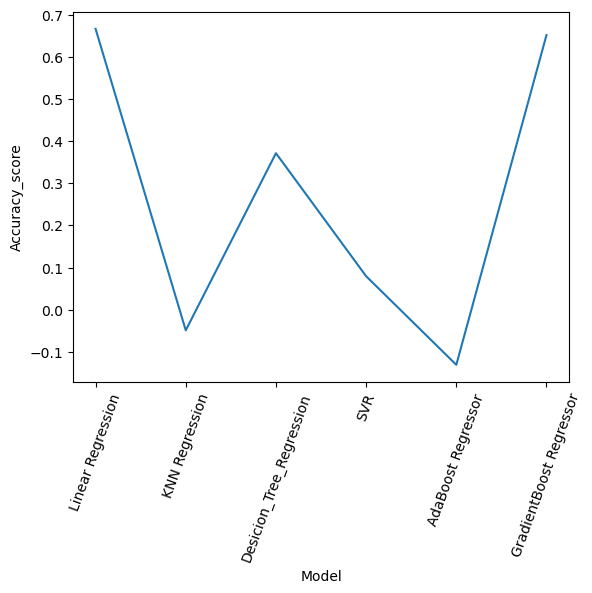

In [50]:
sns.lineplot(x=Accu_scores['Model'],y=Accu_scores['Accuracy_score'],data=Accu_scores)
plt.xticks(rotation=70)